<a href="https://colab.research.google.com/github/jiin124/Introduction-to-NLP-using-deep-learning/blob/main/03_%ED%96%89%EB%A0%AC%EA%B3%B1%EC%9C%BC%EB%A1%9C_%EC%9D%B4%ED%95%B4%ED%95%98%EB%8A%94_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 행렬곱으로 이해하는 신경망

인공신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정을 순전파라고 한다. 다르게 말하면 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정을 순전파라고 한다. 여기서는 신경망의 순전파는 결과적으로 행렬의 곱셈으로 이해할 수있다는 것과 다층 퍼셉트론의 내의 학습 가능한 매개변수인 가중치 w와 편향 b의 개수를 추정하는 방법에 대해 학습한다. 

## 1. 순전파(Forward Propagation)

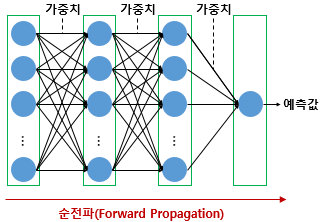

활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥러닝 모델을 설계하고 나면 입력값은 입력층 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향한다. 그리고 출력층에서 모든 연산을 마친 예측값이 나오게 된다. 이과 같이 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정을 순전파라고 한다. 

## 2. 행렬곱으로 순전파 이해하기

입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현해본다면?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

#3개의 입력과 2개의 출력
model.add(Dense(2,input_dim=3,activation='softmax'))

소프트 맥스 회귀를 한다고 가정하고 활성화 함수는 소프트 맥스 함수를 임의로 기재하였다. 소프트 맥스 회귀는 출력 벡터의 차원을 2로 두면 이진 분류를 수행하는 모델이 된다. 로지스틱 회귀가 아닌 소프트 맥스 회귀로도 이진 분류는 수행 가능함을 기억해두자. 

케라스에서 .summary()를 사용하면 해당 모델에 존재하는 모든 매개 변수(가중치 w와 편향 b의 개수)를 확인할 수 있다. 


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


매개변수의 수가 8개라고 나온다. 위 신경망에서 학습 가능한 매개변수인 w와 b의 개수가 총 합해서 8개라는 의미, 실제로 그런지 위 신경망을 행렬의 곱셈 관점에서 이해해보자. 

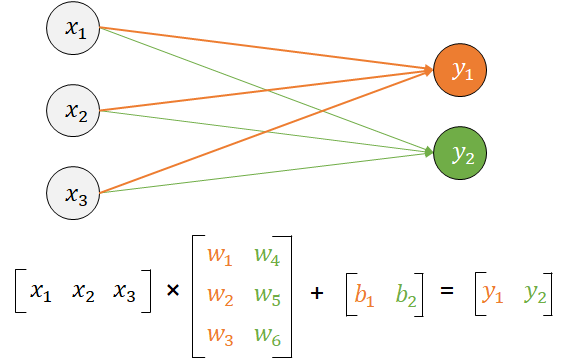

위 모델은 입력의 차원이 3, 출력의 차원이 2이다. 또는 신경망의 용어로서 표현한다면, 입력층의 뉴런이 3개, 출력층의 뉴런이 2개라고 말할 수 있다. 위 신경망 그림에서 화살표 각각은 가중치 w를 의미하고 있다. 3개의 뉴런과 2개의 뉴런 사이에는 총 6개의 화살표가 존재하는데, 이는 위 신경망에서 가중치 w의 개수가 6개임을 의미한다. 

이를 행렬곱 과점에서는 3차원 벡터에서 2차원 벡터가 되기 위해서 3x2 행렬을 곱했다고 이해할 수 있다. 그리고 이 행렬 각각의 원소가 각각의 w가 되는 것이다. 위 그림에서는 y1에 연결되는 화살표 w1,w2,w3 를 주황색으로 표현하고, y2에 연결되는 화살표 w4,w5,w6 를 초록색으로 표현했다. 

일반적으로 동그란 뉴런과 화살표로 표현하는 인공 신경망의 그림에서는 편향 b의 경우에는 편의상 생략되는 경우가 많지만, 인공 신경망 내부적으로는 편향 b의 연산 또한 존재한다. 위 그림에서 뉴런과 화살표로 표현하 인공 신경망의 그림에서는 편향을 표현하지 않았지만, 아래의 차원을 기준으로 개수를 확인하면 된다. 위의 인공 신경망의 경우에는 출력의 차원이 2인데, 이에 따라서 편향 또한 b1,b2로 두개이다. 

가중치 w의 개수가 w1,w2,w3,w4,w5,w6로 총 6개이며, 편향 b의 개수가 b1,b2로 두개이므로, 총 학습가능한 매개변수의 수는 8개이다. 이는 앞서 model.summary()를 했을 때 확인한 매개변수의 수인 8개와 일치한다. 

y1,y2를 구하는 과정을 수식으로 표현하면 다음과 표현할 수 있다. 



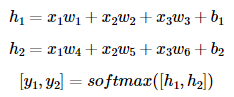

좀 더 간단하게 식을 표현해보겠다. 입력 x1,x2,x3 을 벡터 x로 명명하자. 

X=[x1,x2,x3]

그리고 w1,w2,w3,w4,w5,w6를 원소로 하는 3x2 행렬을 가중치 행렬 w, 그리고 편향 b1,b2를 원소로 하는 벡터를 B 그리고 y1,y2를 원소로 하는 출력 벡터를 y로 명명한다. 이 경우 위의 인공 신경망은 다음과 같이 표현할 수 있다. 

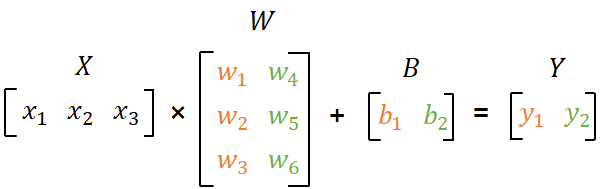

다시말해 수식은 다음과 같다. 

y=xw+b

# 3. 행렬곱으로 병렬 연산 이해하기

행렬곱을 사용하면 병렬연산도 가능하다. 이번에는 인공신경망이 4개의 샘플을 동시에 처리해본다고 하자. 4개의 샘플을 하나의 행렬 X로 정의하고, 인공신경망의 순전파를 행렬곱으로 표현하면 다음과 같다. 

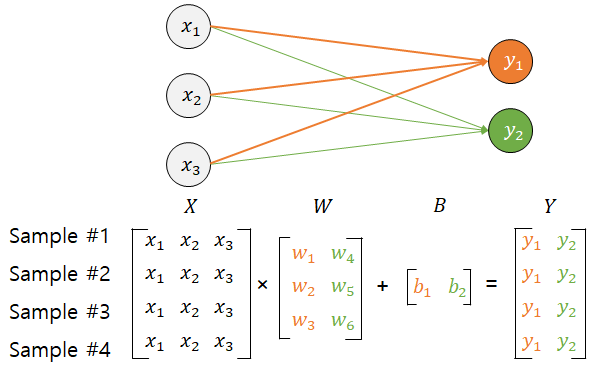

여기서 혼동하지 말아야 할것은 인공신경망의 4개의 샘플을 동시에 처리하고 있지만 여기서 학습가능한 매개변수의 수는 여전히 8개라는 점이다. 이렇게 인공 신경망이 다수의 샘플을 동시에 처리하는 것을 배치연산이라고 부른다. 

## 4. 행렬곱으로 다층 퍼셉트론의 순전파 이해하기

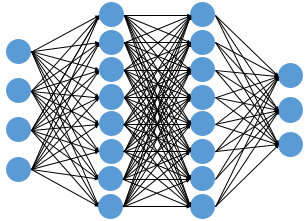

위와 같은 인공 신경망이 있다. 주어진 인공 신경망을 케라스로 구현해보자!!

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

#4개의 입력과 8개의 출력
model.add(Dense(8,input_dim=4,kernel_initializer='uniform',activation='relu'))

#이어서 8개의 출력
model.add(Dense(8,activation='relu'))

#이어서 3개의 출력
model.add(Dense(3,activation='softmax'))

위의 코드의 주석에서 () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미하며 입력층부터 출력층까지 순차적으로 인공신경망의 층을 한층씩 추가하였다. 케라스를 사용하며 이렇게 간단하게 층을 딥하게 쌓은 딥러닝 모델을 구현할 수 있다. 

### (2) 행렬의 크기 추정해보기

각 층을 기준으로 입력과 출력의 개수를 정리하면 다음과 같다. 

입력층 : 4개의 입력과 8개의 출력
은닉층1 : 8개의 입력과 8개의 출력
은닉층2 : 8개의 입력과 3개의 출력
출력층 : 3개의 입력과 3개의 출력

이제 위의 정보를 가지고 층마다 생기는 가중치와 편향 행렬의 크기를 추정해보자. 단 배치 크기는 1을 가정한다. 

#### 입력층->은닉층1

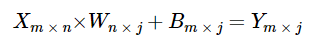




layer 1의 입력행렬 x의 크기는 1*4이다. layer 1 의 출력은 8개이므로, 그에 따라 출력 행렬 y의 크기는 1*8이 된다. 

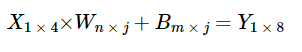

그런데 가중치 행렬 w의 행은 입력행렬 x의 열과 같아야 하므로 w은 4*j

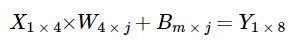

편향 행렬B는 출력 행렬 Y의 크기에 영향을 주지 않으므로 편향 행렬B의 크기는 출력 행렬 Y의 크기와 같다. 

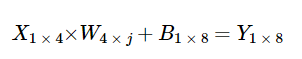

가중치 행렬 w의 열은 출력행렬 y의 열과 동일해야한다. 

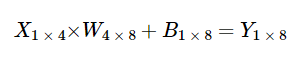

입력층과 은닉층1 사이의 가중치 행렬과 편향 행렬의 크기를 구했다. 

인공 신경망이 입력층에서 은닉층을 지나 출력층에서 예측값을 계산하기까지의 과정을 행렬 연산으로 가정하고 행렬의 크기를 추정해보았다. 이와 같이 순전파를 진행하고 예측값을 구하고 이 다음에 인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고 오차로부터 가중치와 편향을 업데이트하는 일이다. 즉 인공 신경망의 학습 단계에 해당된다. 

이떄 인공신경망은 순전파와는 반대방향으로 연산을 진행하며 가중치를 업데이트하는데 이과정을 역전파라고 한다. 